## Homework #4

Below is a rough implementation of LeNet-5 using Keras.  The implementation is not exactly the same due to the limitation of the pre-built layers in Keras.  This code borrows heavily from Fabien Tence and Taylor Arnold whose original code can be found at:

1. https://www.kaggle.com/ftence/keras-cnn-inspired-by-lenet-5/code
2. http://statsmaths.github.io/stat665/lectures/lec18/notebook18.html

The latter web page has a number of useful examples which I encourage you to explore in the context of this assignment.  

The goal of this assignment is to bring LeNet-5 and deep learning "to life" for you and provide you a launching off point for your own exploration.  In the context of this assignment I want you to experiment with the workings of a deep net to see if you can find a better configuration (different/more/less layers, layer configuration, learning rates, epochs, batch size, etc.).  But as researchers we need to keep good notes about our experiments and results.

Starting with the current network specification below:

1.  Draw a diagram that captures the configuration of this deep net.
2.  Very briefly describe the differences between this network and LeNet-5 as described in the LeCun paper

Run the network and examine the confusion matrix from the testing results as well as the samples of correct and incorrect classifications.  

3. Describe any patterns you see in what the network is having trouble learning

Then start experimenting with different layers, and different layer configurations.  Make sure to pay attention to smaller details like activation functions.  Also, this network uses a Dropout function.  That is also a helpful source of "things to try".  Create three new networks and for each one:

4. Draw a diagram capturing the new network configuration
5. Describe why you chose to make those changes
6. Describe how it does better or worse than the first network (Also try to guess as to why that might be)

You will likely try far more than three configuration in search of something that performs better (or at least in an interesting way).  But, you are only responsible for writing up three new network configurations.  Notice that I have some commented out code which may or may not offer some things to try.  DO NOT LIMIT YOURSELF TO THE COMMENTED OUT CODE.

Due 12/29 at 6:30 PM through D2L in PDF format.


In [172]:
import pandas as pd
import numpy as np
np.random.seed(1337) 
import matplotlib.pyplot as plt

from keras import backend as K
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.convolutional import Convolution2D, MaxPooling2D, ZeroPadding2D, AveragePooling2D
from keras.utils import np_utils
from keras.optimizers import SGD, RMSprop

img_rows, img_cols = 28, 28

batch_size = 100 
nb_classes = 10 
nb_epoch = 30

# Read the train and test datasets
train = pd.read_csv("./small_train.csv",header = None).values
test  = pd.read_csv("./small_test.csv",header = None).values

# Check Keras backend
if(K.image_dim_ordering()=="th"): # for Theano
    X_train = train[:, 1:].reshape(train.shape[0], 1, img_rows, img_cols)
    X_test = test[:, 1:].reshape(test.shape[0], 1, img_rows, img_cols)
    in_shape = (1, img_rows, img_cols)
else:  # for TensorFlow
    X_train = train[:, 1:].reshape(train.shape[0], img_rows, img_cols, 1)
    X_test = test[:, 1:].reshape(test.shape[0], img_rows, img_cols, 1)
    in_shape = (img_rows, img_cols, 1)

# First data is label (already removed from X_train)
y_train = train[:, 0] 

# Make the value floats in [0;1] instead of int in [0;255]
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

# convert class vectors to binary class matrices (ie one-hot vectors)
Y_train = np_utils.to_categorical(y_train, nb_classes)

# Display the shapes to check if everything's ok
print('X_train shape:', X_train.shape)
print('Y_train shape:', Y_train.shape)
print('X_test shape:', X_test.shape)

model = Sequential()

# Add padding to take 28x28 to 32x32
model.add(ZeroPadding2D((2,2),input_shape=in_shape))

# Roughly equivalent to C1
model.add(Convolution2D(6, (5, 5), activation = 'relu',  kernel_initializer='he_normal'))

# Roughly equivalent to S2
model.add(AveragePooling2D(pool_size=(2, 2)))
model.add(Activation("sigmoid"))

# model.add(Convolution2D(6, (2, 2), stride = (2,2),  activation = 'sigmoid', kernel_initializer='he_normal'))
# model.add(MaxPooling2D(pool_size=(2, 2)))

# Roughly equivalent to C3
model.add(Convolution2D(16, (5, 5), activation = 'relu', kernel_initializer='he_normal'))

# Roughly equivalent to S4
model.add(AveragePooling2D(pool_size=(2, 2)))
model.add(Activation("sigmoid"))

model.add(Dropout(0.2))

# model.add(Convolution2D(16, (2, 2), stride = (2,2),  activation = 'sigmoid', kernel_initializer='he_normal'))
# model.add(MaxPooling2D(pool_size=(2, 2)))

# Roughly equivalent to C5
model.add(Convolution2D(120, (5, 5), activation = 'relu', kernel_initializer='he_normal'))
model.add(Flatten())

# Roughly equivalent to F6
model.add(Dense(84, activation = 'tanh', kernel_initializer='he_normal'))


# Output Layer
model.add(Dense(nb_classes, activation = 'softmax', kernel_initializer='he_normal')) #Last layer with one output per class

# Use RMSprop for training weights
model.compile(loss='categorical_crossentropy', optimizer=RMSprop(), metrics=["accuracy"])

# Alternative training approach using stochastic gradient descent (very very slow)
# sgd = SGD(lr=0.4,momentum=0.1)
# model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=["accuracy"])

# Let's Learn!!
model.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1)

# Use the test data to see how we do
yPred = model.predict_classes(X_test)


X_train shape: (5000, 28, 28, 1)
Y_train shape: (5000, 10)
X_test shape: (1000, 28, 28, 1)
Epoch 1/30
5000/5000 [==============================] - 1s - loss: 2.3614 - acc: 0.0956     
Epoch 2/30
5000/5000 [==============================] - 1s - loss: 2.3267 - acc: 0.1028     
Epoch 3/30
5000/5000 [==============================] - 1s - loss: 2.3173 - acc: 0.0998     
Epoch 4/30
5000/5000 [==============================] - 1s - loss: 2.3108 - acc: 0.1000     
Epoch 5/30
5000/5000 [==============================] - 1s - loss: 2.2942 - acc: 0.1256     
Epoch 6/30
5000/5000 [==============================] - 1s - loss: 2.2230 - acc: 0.1724     
Epoch 7/30
5000/5000 [==============================] - 1s - loss: 2.0919 - acc: 0.2648     
Epoch 8/30
5000/5000 [==============================] - 1s - loss: 1.9353 - acc: 0.3204     
Epoch 9/30
5000/5000 [==============================] - 1s - loss: 1.7598 - acc: 0.3918     
Epoch 10/30
5000/5000 [==============================] - 1s - loss: 1.63

In [173]:
# Line up our outputs on the test set with the labels from the test set and calculate a confusion matrix

res = np.array([yPred,test[:,0]]).reshape(1000,2)
cm = np.array([[0] * 10] * 10)
for p in res:
    cm[p[0],p[1]] += 1

print(cm)

[[13  3  6 15  7  7 15  8 12  7]
 [ 9 37 34  1  4  6 23 14  3  6]
 [ 4 24 30  1  0  4  4 11  1  5]
 [ 8  3  8  7 11  6  6  3 10 15]
 [22  9  9 14 15 14 15  7  9 14]
 [ 8  9  4 13 13 39  2  6 13  8]
 [ 4 16 11  7  7 10 13 15  7  4]
 [ 7  8 10 13  2  5 15 17 13  5]
 [10  2  5  5 16  7 10  4  9 10]
 [20  2  3 17 11  8  9  9 10 10]]


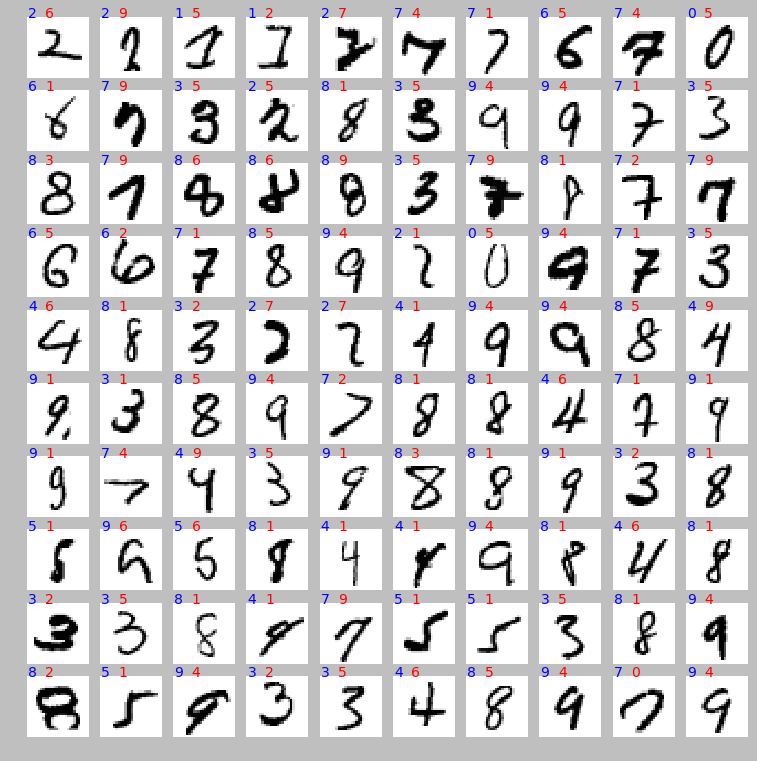

In [174]:
#  Lets look at the ones we got WRONG in thte test set

test_wrong = [im for im in zip(X_test,yPred,test[:,0]) if im[1] != im[2]]

plt.figure(figsize=(10, 10))
for ind, val in enumerate(test_wrong[:100]):
    plt.subplots_adjust(left=0, right=1, bottom=0, top=1)
    plt.subplot(10, 10, ind + 1)
    im = 1 - val[0].reshape((28,28))
    plt.axis("off")
    plt.text(0, 0, val[2], fontsize=14, color='blue')
    plt.text(8, 0, val[1], fontsize=14, color='red')
    plt.imshow(im, cmap='gray')

plt.show()

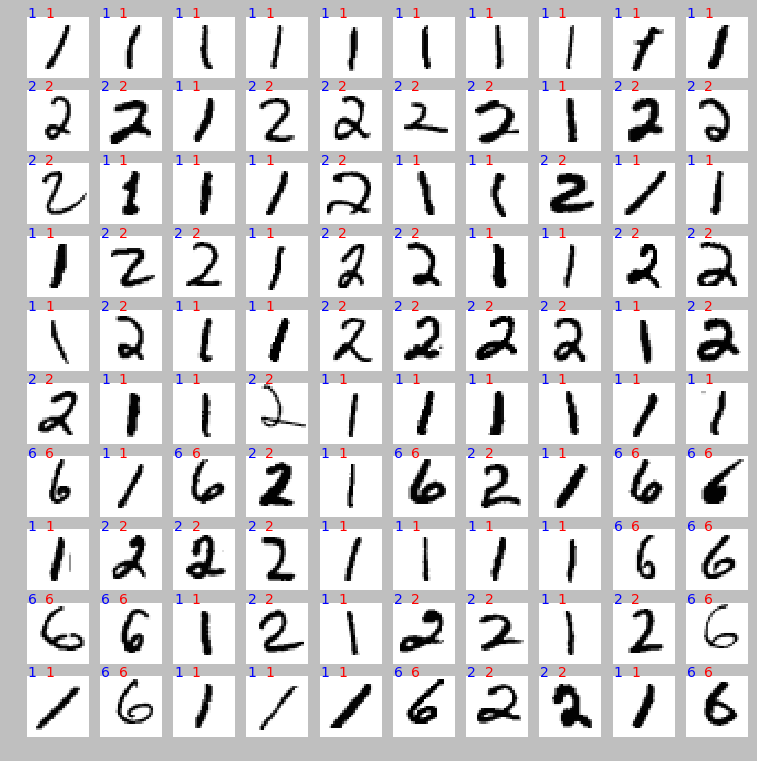

In [169]:
#  Lets look at some of the ones we got RIGHT in thte test set

test_wrong = [im for im in zip(X_test,yPred,test[:,0]) if im[1] == im[2]]

plt.figure(figsize=(10, 10))
for ind, val in enumerate(test_wrong[:100]):
    plt.subplots_adjust(left=0, right=1, bottom=0, top=1)
    plt.subplot(10, 10, ind + 1)
    im = 1 - val[0].reshape((28,28))
    plt.axis("off")
    plt.text(0, 0, val[2], fontsize=14, color='blue')
    plt.text(8, 0, val[1], fontsize=14, color='red')
    plt.imshow(im, cmap='gray')

plt.show()

In [85]:
# Routine to take the full training data and create a smaller training and test data set

# a = {0:0,1:0,2:0,3:0,4:0,5:0,6:0,7:0,8:0,9:0}
# new_train = []
# new_test = []

# train = pd.read_csv("./train.csv").values
# for t in train:
#     if a[t[0]] < 500:
#         new_train.append(t)
#     elif a[t[0]] < 600:
#         new_test.append(t)
    
#     a[t[0]] += 1

# np.savetxt('small_train.csv',new_train,delimiter=',',fmt='%d')
# np.savetxt('small_test.csv',new_test,delimiter=',',fmt='%d')